# Econ 441B Week 6 \& 7 Assignment
# Richard Grigorian (UID: 505-088-797)

In [1]:
import pandas as pd
# from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense

In [2]:
# drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


## 1. Preprocess your data into scaled input variables and an output variable.

In [2]:
# Loading Data
df = pd.read_csv("CLV.csv")

In [3]:
df

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [4]:
# Defining input and output variables
X = df.drop(["Unnamed: 0","Customer Lifetime Value"], axis =1 )
y = df['Customer Lifetime Value']

In [5]:
# Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = .3,
    random_state = 425
)

In [6]:
# Scale Inputs
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2. Run a GridSearch CV on at least 10 possible combinations of hyper-parameters.

In [25]:
# Initialize model
clf = MLPRegressor()

# Hyper-parameter Tuning
## 12 hyper-parameter combinations
params = {
    "hidden_layer_sizes": [(1,), (10,), (20,5,), (5,5,5,)], 
    "activation" : ['relu','logistic', 'tanh']
}

In [26]:
# Grid Search
grid = GridSearchCV(
    clf,
    params,
    cv = 5)

grid.fit(X_train, y_train)

c:\Users\Richard PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Richard PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Richard PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Richard PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Richard PC\anaconda3\lib\site-packages\skle

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic', 'tanh'],
                         'hidden_layer_sizes': [(1,), (10,), (20, 5),
                                                (5, 5, 5)]})

In [27]:
# Best Model
print(grid.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (5, 5, 5)}


## 3. Train a model with the optimal solution from GridSearch.

In [28]:
# Specify the model from CV
## ** unpacks the dictionary
MLPRegressor(**grid.best_params_)

MLPRegressor(hidden_layer_sizes=(5, 5, 5))

In [29]:
# Train the model
results = MLPRegressor(**grid.best_params_).fit(X_train, y_train)

c:\Users\Richard PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## 4. What are the in-sample and out of sample MSEs.

In [30]:
# In Sample MSE
MSE_in = mean_squared_error(
    y_train,
    results.predict(X_train)
)

# Out Sample MSE
MSE_out = mean_squared_error(
    y_test,
    results.predict(X_test)
)
print('In-Sample MSE: ', MSE_in)
print('Out-Sample MSE: ', MSE_out)

In-Sample MSE:  40797657.97737097
Out-Sample MSE:  50037919.17204656


## 5. Build a Keras with the architecture defined by GridSearchCV.

In [7]:
# Initialize Model
net = Sequential()
# Add Hidden Layers
net.add(Dense(5, input_dim = 16, activation = 'relu'))
net.add(Dense(5, activation = 'relu'))
net.add(Dense(5, activation = 'relu'))
# Add Output layer
net.add(Dense(1, activation = 'relu'))

# Compile the model
net.compile(loss='mean_squared_error', optimizer = 'adam')

# Train the model
net.fit(
    X_train,
    y_train,
)

# Out-Sample MSE
loss = net.evaluate(X_test,y_test)
print('#################################')
print(f'Test Loss: {loss:.4f}')

86/86 [==============================] - 0s 1ms/step - loss: 122721024.0000
#################################
Test Loss: 122721024.0000


## 6. Make two visualizations of your NN using “plot_model” and “ann_viz”.

In [8]:
# Imports for Keras Ploting
from keras.utils import plot_model
import graphviz
import pydot

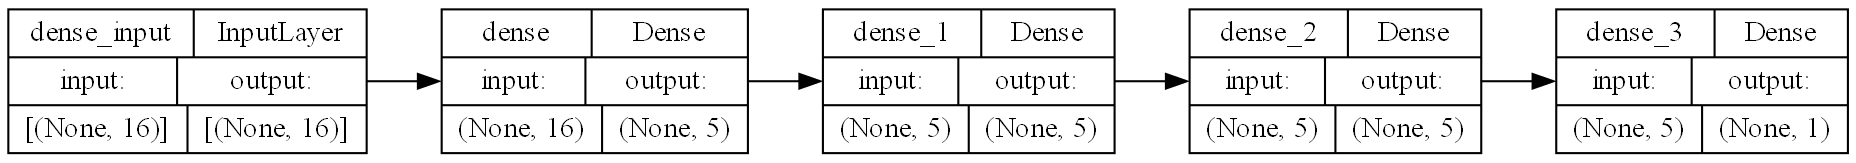

In [21]:
# Plot using Keras
plot_model(
    net,
    show_layer_names = True,
    show_shapes = True,
    dpi = 150,
    rankdir = 'LR'
)

In [24]:
# Import for ann_viz
from ann_visualizer.visualize import ann_viz

# Plot using ann_viz
ann_viz(net, title = 'Ann_viz - Neural Network')

![Graph of Neural Network](network.png)